# Convolutional Neural Network - CIFAR10 raw data using Keras

This notebook will guide you through the use of the `keras` package to train different types of CNN for image recognition. You are going to use the `CIFAR10` dataset.


## Loading the packages

In [31]:
import numpy as np
from matplotlib import pyplot as plt

#we import various classes from keras to simplify usage below (no need to preceed declaration by namespace 'tensorflow.keras...'
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, Activation, BatchNormalization, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

from sklearn import metrics as me

%matplotlib inline

## Loading the raw data
First load the `cifar10` dataset and normalize all values to be in the range [0, 1]

In [32]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('original data type : ', X_train.dtype)
print('original data range [', np.min(X_train), ',', np.max(X_train),']')

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

print('\nconverted data type : ', X_train.dtype)
print('converted data range [', np.min(X_train), ',', np.max(X_train),']')

print('\ntraining data shape : ', X_train.shape)
print('testing data shape  : ', X_test.shape)

original data type :  uint8
original data range [ 0 , 255 ]

converted data type :  float32
converted data range [ 0.0 , 1.0 ]

training data shape :  (50000, 32, 32, 3)
testing data shape  :  (10000, 32, 32, 3)


Define a function to plot some images from CIFAR; rows correspond to same class

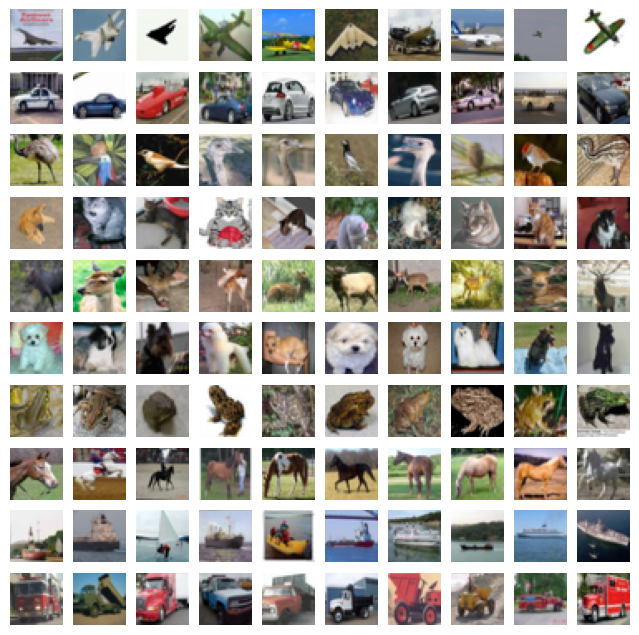

In [33]:
def show_imgs(X,y):
    plt.figure(1, figsize=(8,8))
    k = 0
    for i in range(0,10):
        for j in range(0,10):
            while y[k] != i: k += 1
            plt.subplot2grid((10,10),(i,j))
            plt.imshow(X[k])
            plt.axis('off')
            k += 1
    plt.show()


show_imgs(X_test, y_test)


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [34]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Define the network
The neural network will be a CNN. We will train through E epochs, using batches of size B. We can try with 30 epochs and batches of 128 images.

In [35]:
E = 10                # number of epochs
B = 128                # batch size
V = 0.2               # validation split

### START YOUR CODE ###
np.random.seed(1000)
np.random.shuffle(X_train)
X_val = X_train[:int(V*len(X_train))]
Y_val = Y_train[:int(V*len(Y_train))]
X_train = X_train[int(V*len(X_train)):]
Y_train = Y_train[int(V*len(Y_train)):]

# CNN 1
cnn1 = Sequential()
cnn1.add(Conv2D(16, kernel_size=(3, 3), input_shape=(32, 32, 3)))
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Conv2D(32, kernel_size=(3, 3)))
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Flatten())
cnn1.add(Dense(200, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

# CNN 2
cnn2 = Sequential()
cnn2.add(Conv2D(16, kernel_size=(3, 3), input_shape=(32, 32, 3)))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Conv2D(32, kernel_size=(3, 3)))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Flatten())
cnn2.add(Dropout(0.3))
cnn2.add(Dense(300, activation='relu'))
cnn2.add(Dropout(0.3))
cnn2.add(Dense(10, activation='softmax'))

# CNN 3
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3)))
cnn3.add(Activation('relu'))
cnn3.add(Conv2D(32, kernel_size=(3, 3)))
cnn3.add(Activation('relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Conv2D(64, kernel_size=(3, 3)))
cnn3.add(Activation('relu'))
cnn3.add(Conv2D(64, kernel_size=(3, 3)))
cnn3.add(Activation('relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Flatten())
cnn3.add(Dropout(0.3))
cnn3.add(Dense(300, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(10, activation='softmax'))

# CNN 4
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3)))
cnn4.add(Activation('relu'))
cnn4.add(Conv2D(32, kernel_size=(3, 3)))
cnn4.add(Activation('relu'))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Conv2D(64, kernel_size=(3, 3)))
cnn4.add(Activation('relu'))
cnn4.add(Conv2D(64, kernel_size=(3, 3)))
cnn4.add(Activation('relu'))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Conv2D(128, kernel_size=(3, 3)))
cnn4.add(Activation('relu'))
cnn4.add(Conv2D(128, kernel_size=(3, 3)))
cnn4.add(Activation('relu'))
cnn4.add(MaxPooling2D(pool_size=(1, 1)))
cnn4.add(Flatten())
cnn4.add(Dropout(0.3))
cnn4.add(Dense(300, activation='relu'))
cnn4.add(Dropout(0.3))
cnn4.add(Dense(10, activation='softmax'))


### END YOUR CODE ###,

cnn1.summary()
cnn2.summary()
cnn3.summary()
cnn4.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 activation_46 (Activation)  (None, 30, 30, 16)        0         
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 15, 15, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 activation_47 (Activation)  (None, 13, 13, 32)        0         
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                               

## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [36]:
cnn1.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
log1 = cnn1.fit(X_train, Y_train, batch_size=B, epochs=E,
               verbose=1, validation_data=(X_val, Y_val))


Epoch 1/10
313/313 [==============================] - 28s 78ms/step - loss: 2.3033 - accuracy: 0.0998 - val_loss: 2.3030 - val_accuracy: 0.0961
Epoch 2/10
313/313 [==============================] - 25s 79ms/step - loss: 2.3026 - accuracy: 0.1009 - val_loss: 2.3030 - val_accuracy: 0.1016
Epoch 3/10
313/313 [==============================] - 24s 77ms/step - loss: 2.3012 - accuracy: 0.1090 - val_loss: 2.3042 - val_accuracy: 0.0968
Epoch 4/10
313/313 [==============================] - 24s 76ms/step - loss: 2.2974 - accuracy: 0.1169 - val_loss: 2.3061 - val_accuracy: 0.0993
Epoch 5/10
313/313 [==============================] - 25s 79ms/step - loss: 2.2862 - accuracy: 0.1310 - val_loss: 2.3123 - val_accuracy: 0.0989
Epoch 6/10
313/313 [==============================] - 23s 75ms/step - loss: 2.2614 - accuracy: 0.1491 - val_loss: 2.3366 - val_accuracy: 0.0972
Epoch 7/10
313/313 [==============================] - 23s 73ms/step - loss: 2.2123 - accuracy: 0.1838 - val_loss: 2.3715 - val_accuracy:

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

In [37]:
def plot_history(log):   
   f = plt.figure(figsize=(12,4))
   ax1 = f.add_subplot(121)
   ax2 = f.add_subplot(122)
   ax1.plot(log.history['loss'], label='Training loss')
   ax1.plot(log.history['val_loss'], label='Testing loss')
   ax1.legend()
   ax1.grid()
   ax2.plot(log.history['accuracy'], label='Training acc')
   ax2.plot(log.history['val_accuracy'], label='Testing acc')
   ax2.legend()
   ax2.grid()

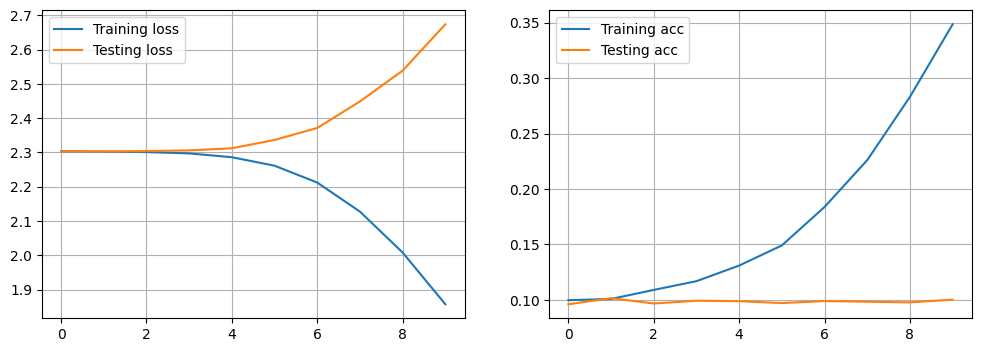

In [38]:
plot_history(log1)

## Training of the other CNNs

Epoch 1/10
313/313 [==============================] - 31s 84ms/step - loss: 2.3033 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.1035
Epoch 2/10
313/313 [==============================] - 26s 83ms/step - loss: 2.3029 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.1010
Epoch 3/10
313/313 [==============================] - 26s 83ms/step - loss: 2.3025 - accuracy: 0.1022 - val_loss: 2.3037 - val_accuracy: 0.0975
Epoch 4/10
313/313 [==============================] - 27s 86ms/step - loss: 2.3018 - accuracy: 0.1046 - val_loss: 2.3055 - val_accuracy: 0.0942
Epoch 5/10
313/313 [==============================] - 26s 84ms/step - loss: 2.2998 - accuracy: 0.1098 - val_loss: 2.3054 - val_accuracy: 0.0955
Epoch 6/10
313/313 [==============================] - 27s 86ms/step - loss: 2.2963 - accuracy: 0.1123 - val_loss: 2.3068 - val_accuracy: 0.0939
Epoch 7/10
313/313 [==============================] - 27s 85ms/step - loss: 2.2896 - accuracy: 0.1218 - val_loss: 2.3118 - val_accuracy:

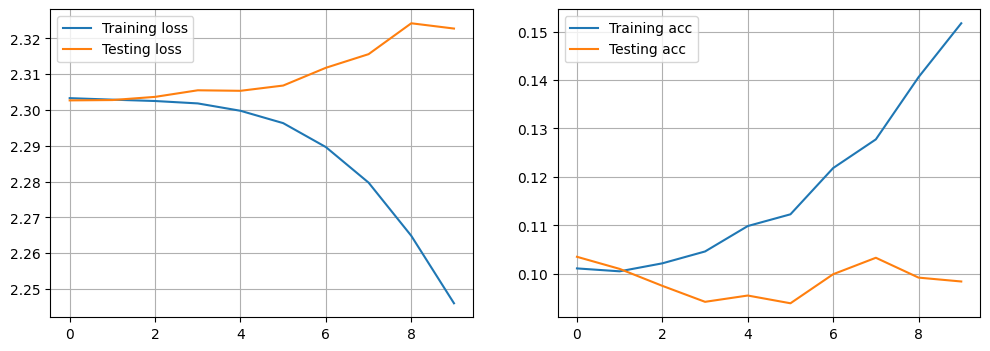

In [39]:
cnn2.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])
log2 = cnn2.fit(X_train, Y_train, batch_size=B, epochs=E,
               verbose=1, validation_data=(X_val, Y_val))

plot_history(log2)

Epoch 1/10
313/313 [==============================] - 95s 275ms/step - loss: 2.3030 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
313/313 [==============================] - 83s 266ms/step - loss: 2.3028 - accuracy: 0.0963 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
313/313 [==============================] - 83s 264ms/step - loss: 2.3029 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
313/313 [==============================] - 79s 251ms/step - loss: 2.3028 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
313/313 [==============================] - 73s 234ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
313/313 [==============================] - 73s 233ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
313/313 [==============================] - 75s 239ms/step - loss: 2.3028 - accuracy: 0.1011 - val_loss: 2.3026 - val_ac

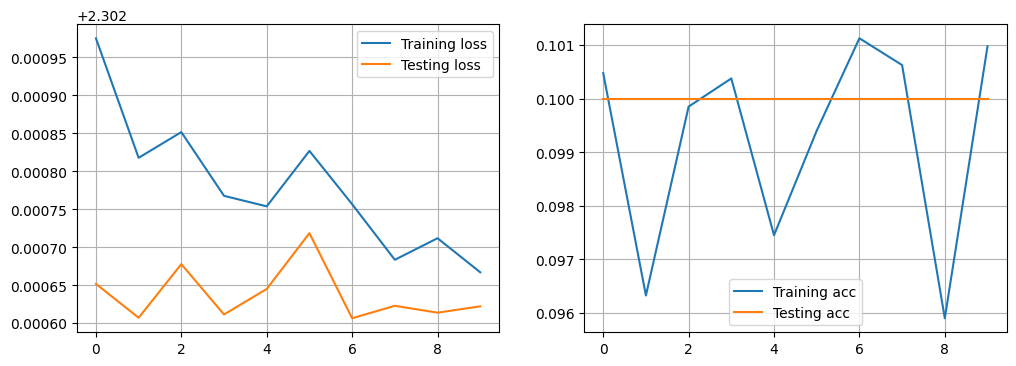

In [40]:
cnn3.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])
log3 = cnn3.fit(X_train, Y_train, batch_size=B, epochs=E,
               verbose=1, validation_data=(X_test, Y_test))

plot_history(log3)

Epoch 1/10
313/313 [==============================] - 86s 257ms/step - loss: 2.3030 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
313/313 [==============================] - 87s 277ms/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
313/313 [==============================] - 88s 282ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
313/313 [==============================] - 88s 281ms/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
313/313 [==============================] - 88s 283ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
313/313 [==============================] - 89s 283ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
313/313 [==============================] - 99s 315ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_ac

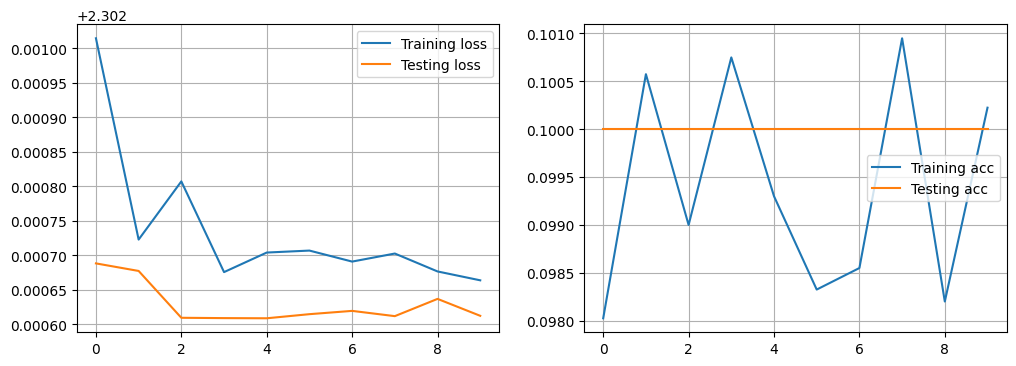

In [41]:
cnn4.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])
log4 = cnn4.fit(X_train, Y_train, batch_size=B, epochs=E,
               verbose=1, validation_data=(X_test, Y_test))

plot_history(log4)

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [44]:
loss_test1, acc_test1 = cnn1.evaluate(X_test, Y_test, verbose=0)
print('Test loss CNN1: ', loss_test1)
print('Test accuracy CNN1: ', acc_test1)

Test loss CNN1:  2.666727066040039
Test accuracy CNN1:  0.10090000182390213


In [45]:
loss_test2, acc_test2 = cnn2.evaluate(X_test, Y_test, verbose=0)
print('Test loss CNN2: ', loss_test2)
print('Test accuracy CNN2: ', acc_test2)

Test loss CNN2:  2.325716733932495
Test accuracy CNN2:  0.09570000320672989


In [46]:
loss_test3, acc_test3 = cnn3.evaluate(X_test, Y_test, verbose=0)
print('Test loss CNN3: ', loss_test3)
print('Test accuracy CNN3: ', acc_test3)

Test loss CNN3:  2.3026208877563477
Test accuracy CNN3:  0.10000000149011612


In [42]:
loss_test4, metric_test4 = cnn4.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test4)
print('Test accuracy:', metric_test4)

Test loss: 2.3026115894317627
Test accuracy: 0.10000000149011612


### Confusion matrix
We can use the `predict()` function to get the predicted classes via `argmax`. The output is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [48]:
pred = np.argmax(cnn1.predict(X_test, verbose=0), axis=1)
confusion = me.confusion_matrix(y_test, pred)

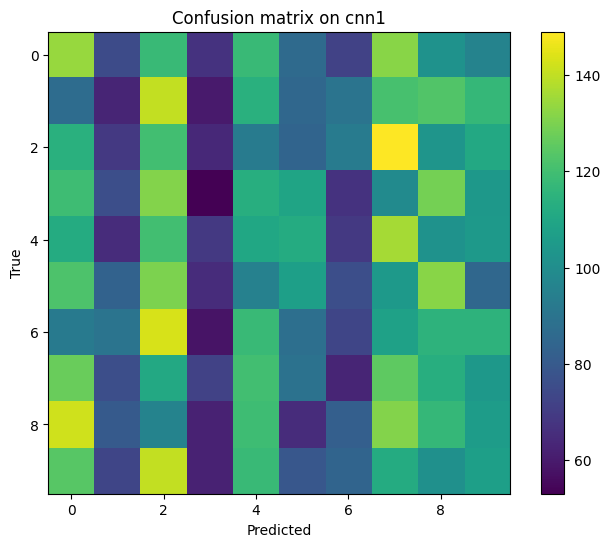

In [51]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion)
plt.colorbar()
plt.title('Confusion matrix on cnn1')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


## Compute and display accuracy results

### Table of results

- number of epochs : 10
- batch size : 128
- validation split : 0.2

The table below shows the results of the different CNNs trained on the CIFAR10 dataset. The cnn architectures can be found in the 5th cell of the notebook.

| CNN | Architecture description | Acc. train | Acc. val  | Acc. test | 
|-----|--------------------------|------------|-----------|-----------|
|  1  | cnn1                     |       |      |      |
|  2  | cnn2                     |       |       |       |
|  3  | cnn3                     |       |      |     |
|  4  | cnn4                     |        |       |     |
